In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')


/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('kc_house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
data.describe()
# there apears to be at least one outlier row; bedrooms 75%= 4, bedrooms max=33 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
data=data.drop(['id','condition','grade'],axis=1) #drop ['id','condition','grade'] variable- irellivent/unusabel variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

In [7]:
#convert date
data['date']=pd.to_datetime(data['date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  float64       
 8   view           21534 non-null  float64       
 9   sqft_above     21597 non-null  int64         
 10  sqft_basement  21597 non-null  object        
 11  yr_built       21597 non-null  int64         
 12  yr_renovated   17755 non-null  float64       
 13  zipcode        21597 non-null  int64         
 14  lat            21597 non-null  float64       
 15  long           2159

In [9]:
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
# convert basement and drop missing/null adat
data=data[data['sqft_basement'] != '?']
data['sqft_basement']=data['sqft_basement'].astype(str).astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21143 non-null  datetime64[ns]
 1   price          21143 non-null  float64       
 2   bedrooms       21143 non-null  int64         
 3   bathrooms      21143 non-null  float64       
 4   sqft_living    21143 non-null  int64         
 5   sqft_lot       21143 non-null  int64         
 6   floors         21143 non-null  float64       
 7   waterfront     18804 non-null  float64       
 8   view           21082 non-null  float64       
 9   sqft_above     21143 non-null  int64         
 10  sqft_basement  21143 non-null  float64       
 11  yr_built       21143 non-null  int64         
 12  yr_renovated   17389 non-null  float64       
 13  zipcode        21143 non-null  int64         
 14  lat            21143 non-null  float64       
 15  long           2114

In [12]:
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
# waterfront, view, yr_renovated has null data

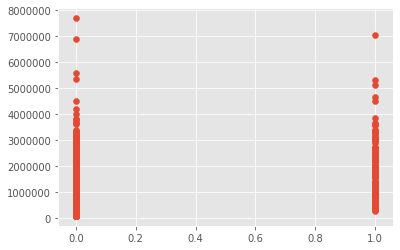

In [14]:
data['waterfront']
plt.scatter(data['waterfront'],data['price']) #waterfront is a dummy variable so averaging doesnt make sense

In [15]:
data=data[data['waterfront'] .isnull()==False] # drop missing 'waterfront' data, rows

In [16]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18804 entries, 1 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           18804 non-null  datetime64[ns]
 1   price          18804 non-null  float64       
 2   bedrooms       18804 non-null  int64         
 3   bathrooms      18804 non-null  float64       
 4   sqft_living    18804 non-null  int64         
 5   sqft_lot       18804 non-null  int64         
 6   floors         18804 non-null  float64       
 7   waterfront     18804 non-null  float64       
 8   view           18749 non-null  float64       
 9   sqft_above     18804 non-null  int64         
 10  sqft_basement  18804 non-null  float64       
 11  yr_built       18804 non-null  int64         
 12  yr_renovated   15474 non-null  float64       
 13  zipcode        18804 non-null  int64         
 14  lat            18804 non-null  float64       
 15  long           1880

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               55
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3330
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [17]:
#view only missing a 55/18804 of data so drop missing rows
data=data[data['view'] .isnull()==False] #drop missing 'view' data

In [18]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18749 entries, 1 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           18749 non-null  datetime64[ns]
 1   price          18749 non-null  float64       
 2   bedrooms       18749 non-null  int64         
 3   bathrooms      18749 non-null  float64       
 4   sqft_living    18749 non-null  int64         
 5   sqft_lot       18749 non-null  int64         
 6   floors         18749 non-null  float64       
 7   waterfront     18749 non-null  float64       
 8   view           18749 non-null  float64       
 9   sqft_above     18749 non-null  int64         
 10  sqft_basement  18749 non-null  float64       
 11  yr_built       18749 non-null  int64         
 12  yr_renovated   15429 non-null  float64       
 13  zipcode        18749 non-null  int64         
 14  lat            18749 non-null  float64       
 15  long           1874

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3320
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

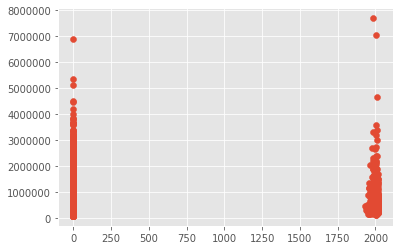

In [19]:
plt.scatter(data['yr_renovated'],data['price'])

In [20]:
# 'yr_renovated' is highly biforcated and has enought data to drop missing/null data


data=data[data['yr_renovated'] .isnull()==False] # drop missing 'yr_renovated' data, rows

In [21]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           15429 non-null  datetime64[ns]
 1   price          15429 non-null  float64       
 2   bedrooms       15429 non-null  int64         
 3   bathrooms      15429 non-null  float64       
 4   sqft_living    15429 non-null  int64         
 5   sqft_lot       15429 non-null  int64         
 6   floors         15429 non-null  float64       
 7   waterfront     15429 non-null  float64       
 8   view           15429 non-null  float64       
 9   sqft_above     15429 non-null  int64         
 10  sqft_basement  15429 non-null  float64       
 11  yr_built       15429 non-null  int64         
 12  yr_renovated   15429 non-null  float64       
 13  zipcode        15429 non-null  int64         
 14  lat            15429 non-null  float64       
 15  long           1542

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
#all data is numerical with no null values

In [23]:
# check for outliers
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.542900e+04,15429.000000,15429.000000,15429.00000,1.542900e+04,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.00000,15429.000000,15429.000000
mean,5.414978e+05,3.378767,2.121508,2085.51656,1.528616e+04,1.494556,0.007518,0.228855,1793.705230,291.811329,1971.130533,81.766544,98077.472098,47.559260,-122.21351,1990.926891,12862.281159
std,3.730219e+05,0.934200,0.767027,919.54924,4.199737e+04,0.538903,0.086384,0.759902,829.165362,443.366153,29.287947,395.668685,53.459610,0.138745,0.14048,684.796238,27783.533647
min,8.200000e+04,1.000000,0.500000,370.00000,5.200000e+02,1.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.51900,399.000000,659.000000
25%,3.200000e+05,3.000000,1.750000,1430.00000,5.050000e+03,1.000000,0.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469100,-122.32800,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.00000,7.620000e+03,1.500000,0.000000,0.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571100,-122.22900,1850.000000,7626.000000
75%,6.435000e+05,4.000000,2.500000,2550.00000,1.072000e+04,2.000000,0.000000,0.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677600,-122.12400,2370.000000,10108.000000
max,7.700000e+06,33.000000,8.000000,13540.00000,1.651359e+06,3.500000,1.000000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.31500,6210.000000,871200.000000


In [24]:
# at least 1 clear outlier; 33 bedroom house where 75% is 4
data=data[data['bedrooms']<33]

In [25]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.542800e+04,15428.000000,15428.000000,15428.000000,1.542800e+04,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000,15428.000000
mean,5.414914e+05,3.376847,2.121532,2085.546733,1.528676e+04,1.494588,0.007519,0.228870,1793.754083,291.792650,1971.132097,81.771843,98077.470443,47.559251,-122.213502,1990.969730,12862.810215
std,3.730332e+05,0.903276,0.767046,919.571405,4.199866e+04,0.538906,0.086387,0.759924,829.170029,443.374451,29.288252,395.680961,53.460948,0.138746,0.140482,684.797756,27784.356395
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.200000e+05,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,98032.750000,47.469075,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571100,-122.229000,1850.000000,7626.000000
75%,6.436125e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677525,-122.124000,2370.000000,10108.250000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


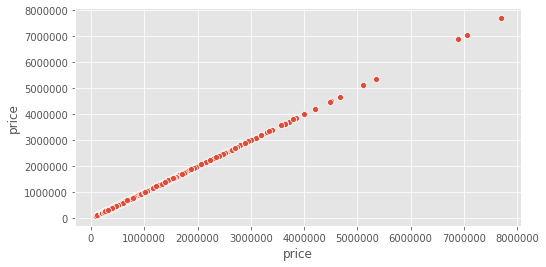

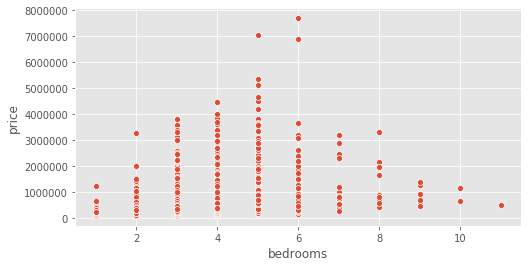

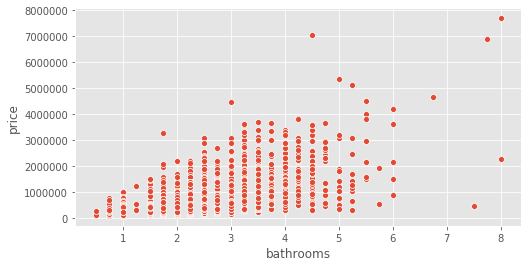

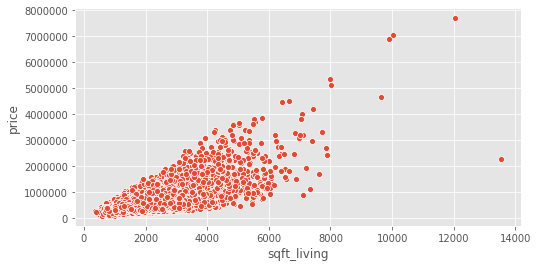

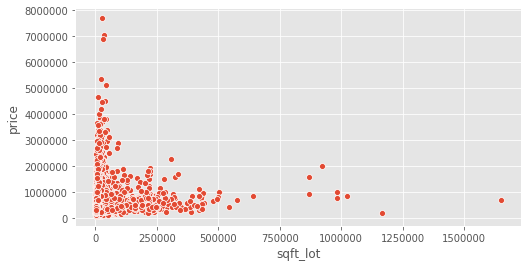

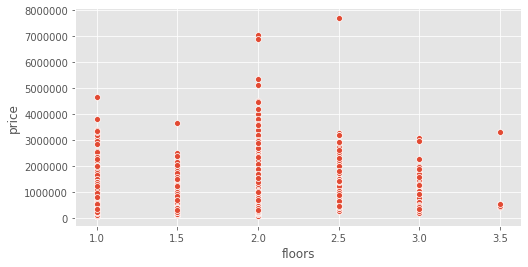

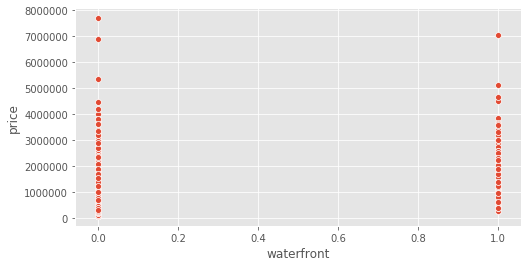

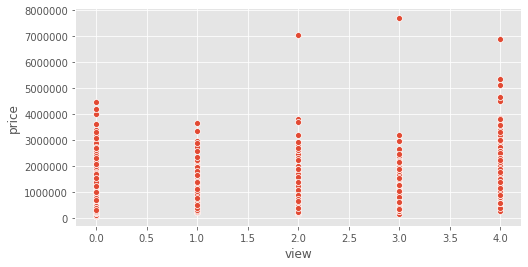

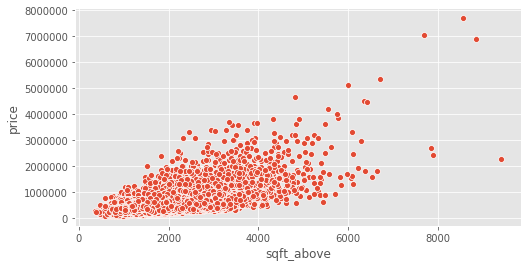

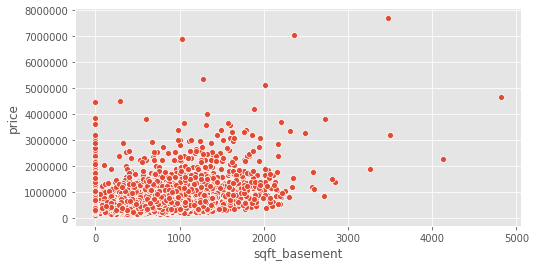

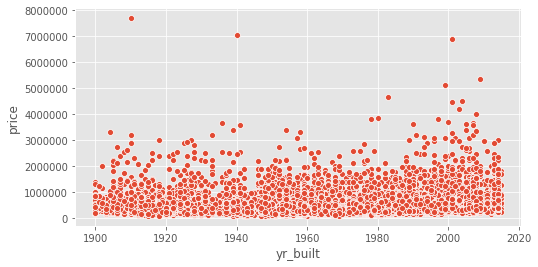

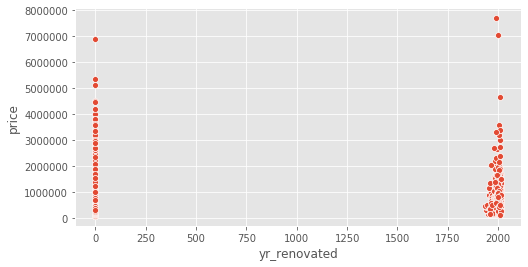

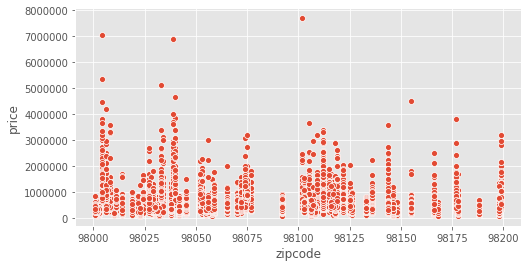

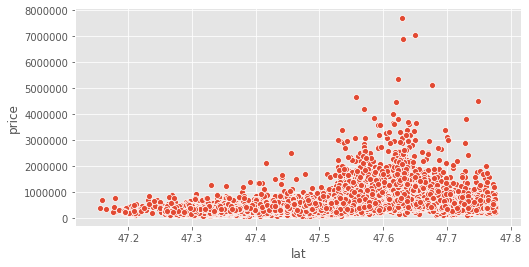

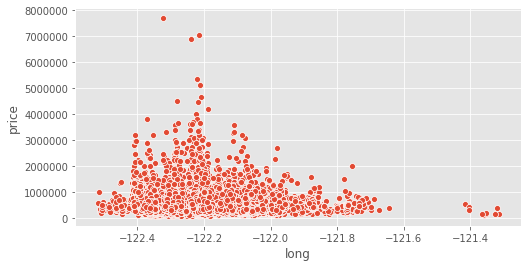

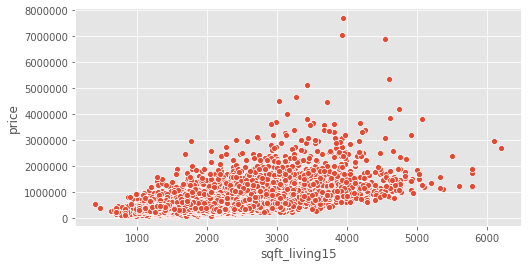

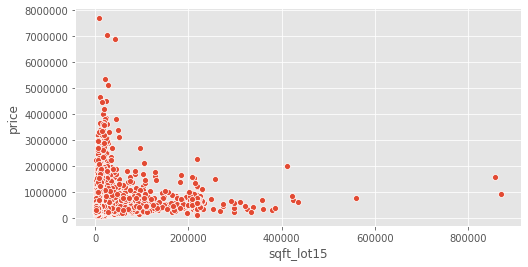

In [26]:
# look vizually for outliers
nd=list(data.columns)
nd.remove('date')
for i in nd:
    fig, ax = plt.subplots(figsize=(8,4))

    sns.scatterplot(data[i],data['price'])


In [27]:
# sqft_living; 2 data points over 12000
# sqft_lot: 1 data point over 1.5 million
# sqft_above: 3 data point over 8000
# sqft_basement: 2 data points over 4000
# long: 8-ish outlier (arounf -121.4): unclear if they are really outliers
# sgft_lot: 2 data points over 800,000

# drop the above data point (excluding long)
data=data[data['sqft_living']<12000]
data=data[data['sqft_lot']<1500000]
data=data[data['sqft_above']<8000]
data=data[data['sqft_basement']<4000]
data=data[data['sqft_lot15']<800000]
data.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.542100e+04,15421.000000,15421.000000,15421.000000,1.542100e+04,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000
mean,5.401305e+05,3.376046,2.119837,2082.700214,1.504900e+04,1.494391,0.007457,0.227677,1791.773750,290.926464,1971.130407,81.549835,98077.487193,47.559242,-122.213564,1990.326243,12710.767071
std,3.631698e+05,0.902379,0.761346,906.251260,3.860637e+04,0.538755,0.086036,0.757480,821.934415,439.889227,29.283235,395.165797,53.463849,0.138742,0.140439,683.864252,25775.091226
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.200000e+05,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571100,-122.229000,1850.000000,7625.000000
75%,6.420000e+05,4.000000,2.500000,2550.000000,1.071000e+04,2.000000,0.000000,0.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677600,-122.124000,2370.000000,10106.000000
max,7.060000e+06,11.000000,7.500000,10040.000000,1.164794e+06,3.500000,1.000000,4.000000,7880.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,560617.000000


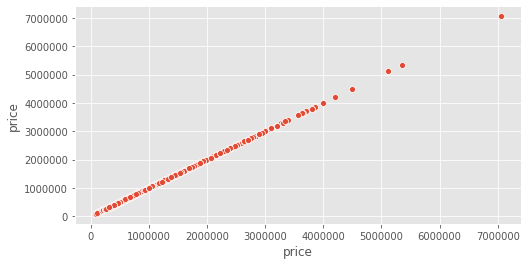

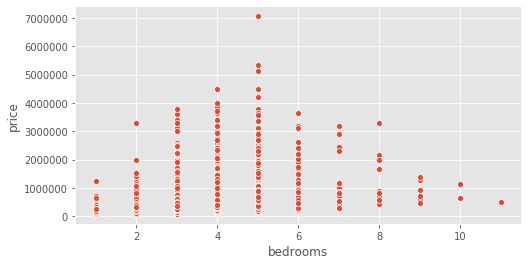

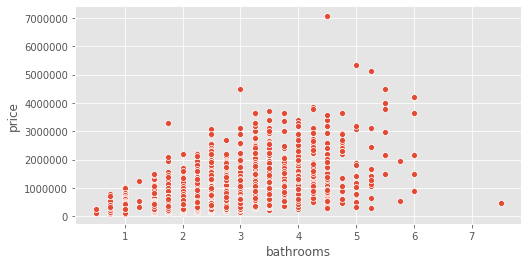

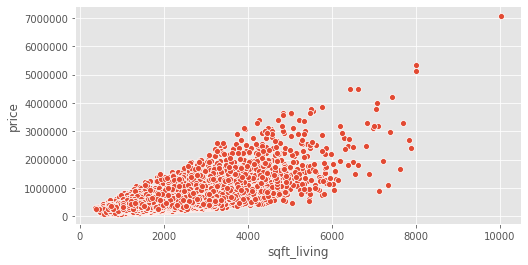

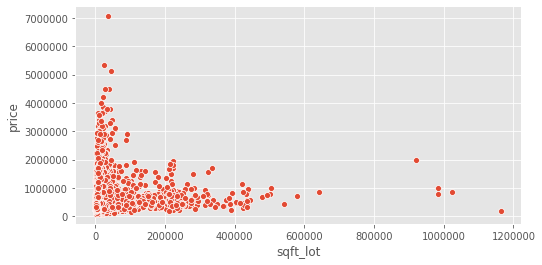

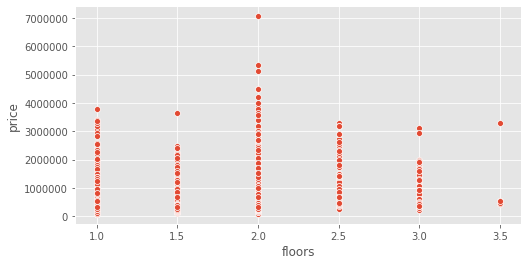

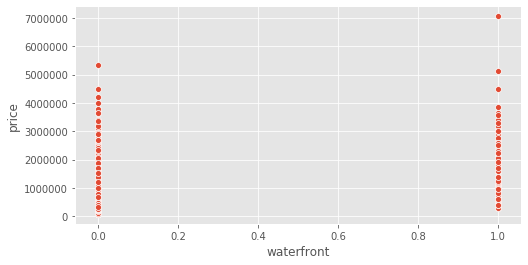

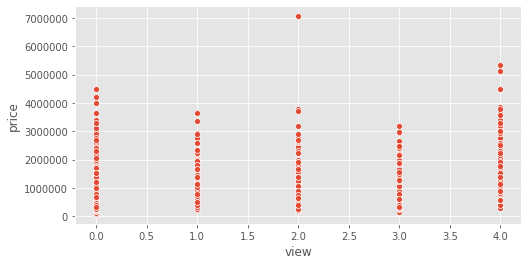

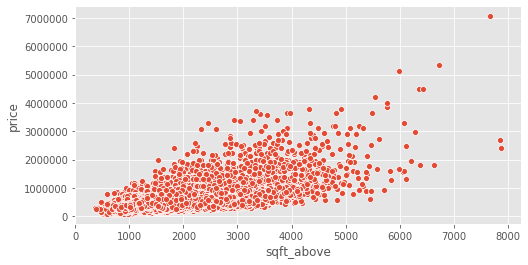

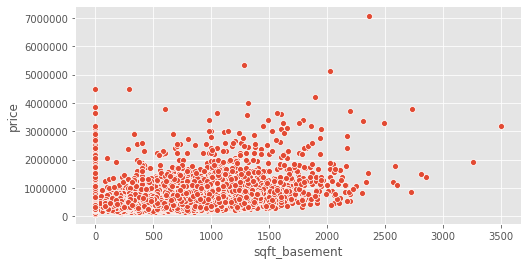

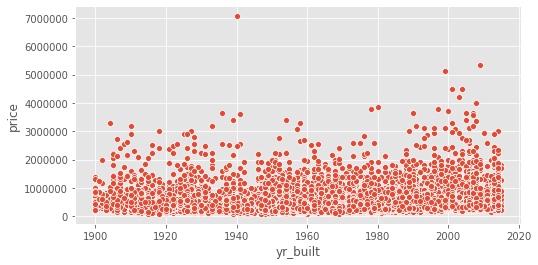

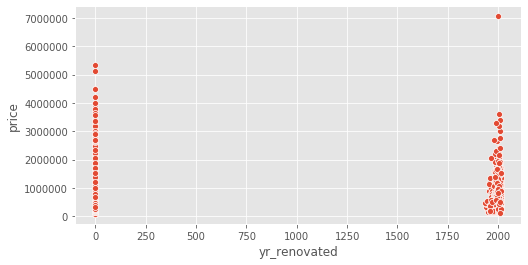

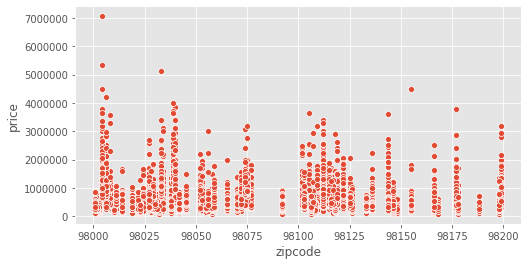

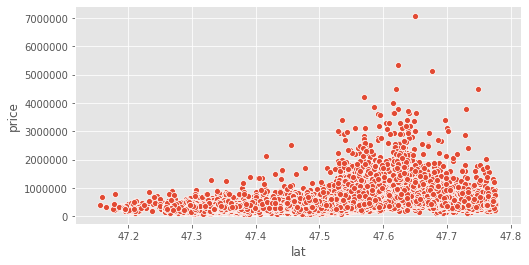

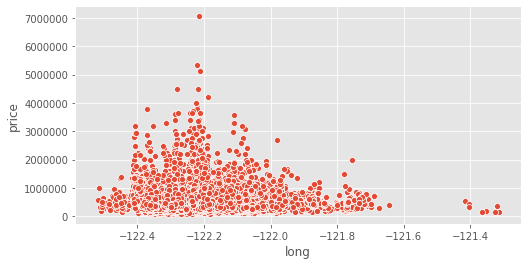

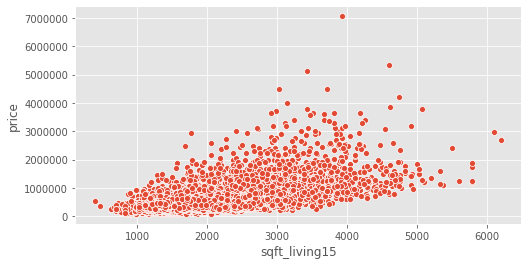

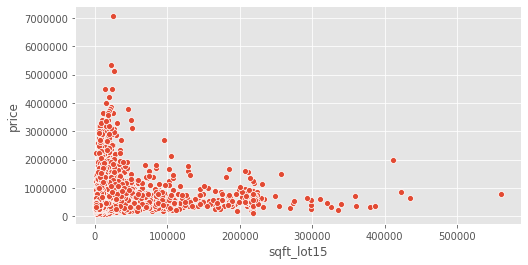

In [28]:
nd=list(data.columns)
nd.remove('date')
for i in nd:
    fig, ax = plt.subplots(figsize=(8,4))

    sns.scatterplot(data[i],data['price'])

In [29]:
# outliers apear to be largly gone without loising to much data

In [30]:
# note colinear variable

# test for colleations in the variables
df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

#correlated variables
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.874884
"(sqft_living, sqft_living15)",0.760537


In [31]:
# potential colinearity problems
# consider dropping sqft_living. It is in all pairs and is likely includeded  in other variables

# (sqft_above, sqft_living)	0.876449
# (sqft_living15, sqft_living)	0.756714


In [32]:
# correlation with price
data.corr()['price']
# most variable not very correlated with price
# sqft_living      0.701632


price            1.000000
bedrooms         0.314969
bathrooms        0.518126
sqft_living      0.701632
sqft_lot         0.084508
floors           0.263569
waterfront       0.276249
view             0.394035
sqft_above       0.607753
sqft_basement    0.309902
yr_built         0.052601
yr_renovated     0.115087
zipcode         -0.049514
lat              0.313877
long             0.022608
sqft_living15    0.589848
sqft_lot15       0.076714
Name: price, dtype: float64

In [33]:
# dummy variables and catagories

In [34]:
# potential catagories, and dummy

# bedrooms?
# bath?
# floor?
# waterfront: built in dummy
# view?    
# yr_reonovated: catagory or dummy 
# zipcode

cats=['bedrooms','bathrooms','floors','view','yr_renovated','zipcode']
cat_names=['bedrooms_dummies','bathrooms_dummies','floors_dummies','view_dummies','yr_renovated_dummies','zipcode_dummies']

bedrooms_dummies=pd.get_dummies(data['bedrooms'], prefix='beds', drop_first=True)
bathrooms_dummies=pd.get_dummies(data['bathrooms'], prefix='baths', drop_first=True)
floors_dummies=pd.get_dummies(data['floors'], prefix='floor', drop_first=True)
view_dummies=pd.get_dummies(data['view'], prefix='view', drop_first=True)
yr_renovated_dummies = pd.get_dummies(data['yr_renovated'], prefix='yr_reno', drop_first=True)
zipcode_dummies= pd.get_dummies(data['zipcode'], prefix='zip', drop_first=True)



# # for i,j in  cats, cat_names:
# for (i,j) in zip(cats, cat_names):
#     j= pd.get_dummies(data[i], prefix=i[:2], drop_first=True)


In [35]:
data = pd.concat([data,bedrooms_dummies,bathrooms_dummies,floors_dummies,view_dummies,yr_renovated_dummies,zipcode_dummies], axis=1)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2170,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1050,...,0,0,0,0,0,0,0,0,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1680,...,0,0,0,0,0,0,0,0,0,0
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3890,...,0,0,0,0,0,0,0,0,0,0
8,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,1050,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2015-02-19,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,1180,...,0,0,0,0,0,0,0,0,0,0
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,1530,...,0,0,0,0,0,0,0,0,0,0
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,2310,...,1,0,0,0,0,0,0,0,0,0
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,1020,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data.isnull().sum()

date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
              ..
zip_98177      0
zip_98178      0
zip_98188      0
zip_98198      0
zip_98199      0
Length: 197, dtype: int64

Questions: 

In [37]:
data_r=data.drop(['date'],axis=1) #isn't linear

y = data_r[['price']]
X = data_r.drop(['price'], axis=1)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

12336 3085 12336 3085


In [54]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [55]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [56]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    2.307613e+10
dtype: float64
Test Mean Squarred Error: price    4.329736e+11
dtype: float64


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'sqft_basement',
       ...
       'zip_98146', 'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168',
       'zip_98177', 'zip_98178', 'zip_98188', 'zip_98198', 'zip_98199'],
      dtype='object', length=375)

851      1981.0
3627     1981.0
13928    1981.0
Name: yr_renovated, dtype: float64

In [42]:
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = []
for i in data_r.columns:
    x_cols.append(str(i))

# for i in data_r.columns[1:]:
#     x_cols.append(str(i))

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data_r).fit()
model.summary()


SyntaxError: invalid syntax (<unknown>, line 1)